# 2주차 회귀분석 : Used Car Price Prediction 

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

[assignment2_train-data.csv 변수 설명]


< y > 
* Price : The price of the used car in INR Lakhs.<br><br>

* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
import pandas as pd 
data = pd.read_csv("assignment2_train-data.csv")

In [4]:
data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [5]:
data.shape

(6019, 14)

## 1. Data Description

In [6]:
# data type 체크 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


* Mileage, Engine, Power가 숫자형이어야 할 것같은데 object로 나온다. 일단 object라는것을 염두해두고 넘어간다.

In [7]:
# 결측치 체크 
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### 결측치 처리

* New_Price의 결측치는 너무 많기 떄문에 변수 삭제를 해주고 나머지는 결측이 존재하는 행만을 제거한다.

In [8]:
data = data.drop('New_Price',axis=1)

In [9]:
data.dropna(axis=0, inplace=True)

## 2. Target distribution 

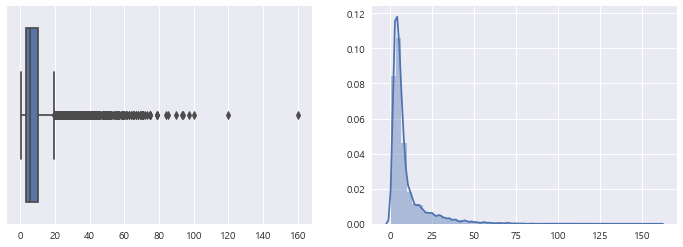

In [10]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["Price"]], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

* 타켓의 그래프가 너무왼쪽으로 치우쳐있어 로그변환을 시행한다.
* 기존의 Price를 지우고 로그변환한 Price_log를 추가하여 타켓으로 사용한다

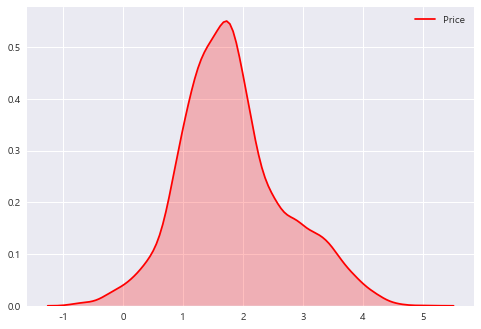

In [11]:
sns.kdeplot(data['Price'].transform(np.log), shade='True', color="r")
plt.show()

In [12]:
data["Price_log"]=data['Price'].transform(np.log)

In [13]:
data = data.drop(['Price'], axis=1)

In [14]:
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.525729
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,1.558145
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,1.386294
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,1.064711
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,0.974560


* 기존의 Price가 지워지고 로그변환한 Price_log가 생성된것을 확인할 수 있다|

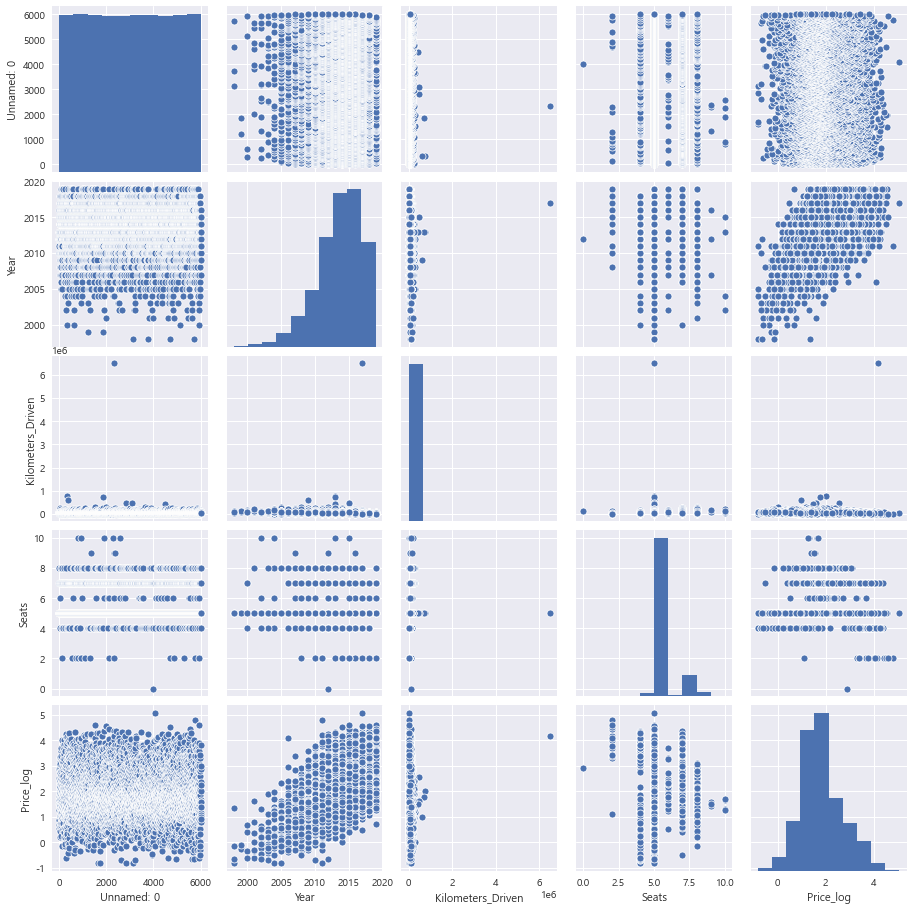

In [15]:
# 회귀분석 기본 가정 검토 : 선형성 
sns.pairplot(data)

* Kilometers_Driven의 이상치 하나가 너무 크기때문에 제거한다.

In [16]:
data["Kilometers_Driven"].max()

6500000

In [17]:
K_index = data.query('Kilometers_Driven > 5000000').index
print(K_index)

Int64Index([2328], dtype='int64')


In [18]:
data.drop(2328, inplace = True)

* Mileage, Engine. Power 같은 경우 뒤에 문자가 붙어있어 object로 나타났던 것이다. <br> 뒤에 문자들을 제거하고 numeric으로 변환하여 분석에 쓰일 수 있도록 한다.

In [19]:
data['Mileage']=data['Mileage'].apply(lambda x : x.replace('kmpl', ''))
data['Mileage']=data['Mileage'].apply(lambda x : x.replace('km/kg', ''))
data['Mileage'] = pd.to_numeric(data["Mileage"])

In [20]:
data['Engine']=data['Engine'].apply(lambda x : x.replace('CC', ''))
data['Engine'] = pd.to_numeric(data["Engine"])

In [21]:
data['Power']=data['Power'].apply(lambda x : x.replace('bhp', ''))
data['Power'] = pd.to_numeric(data["Power"], errors = 'coerce')

* Power같은경우에는 결측치가 공백과 'null bhp'라고 되어있어 공백은 위에서 이미 처리되었지만 'null bhp'는 처리가 안되어 errors = 'coerce'를 적어 일단 무시하고 numeric으로 바꿔준후에 결측치 처리를 시행한다

In [22]:
data.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price_log              0
dtype: int64

In [23]:
data.dropna(axis=0, inplace=True)

In [24]:
data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,2.525729
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,2.875822
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5.0,0.854415
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,1.252763
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,2.862201
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.60,5.0,1.648659
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248,74.00,5.0,0.667829


* Mileage, Engine. Power 뒤에 단위가 사라진것을 알 수 있다. 

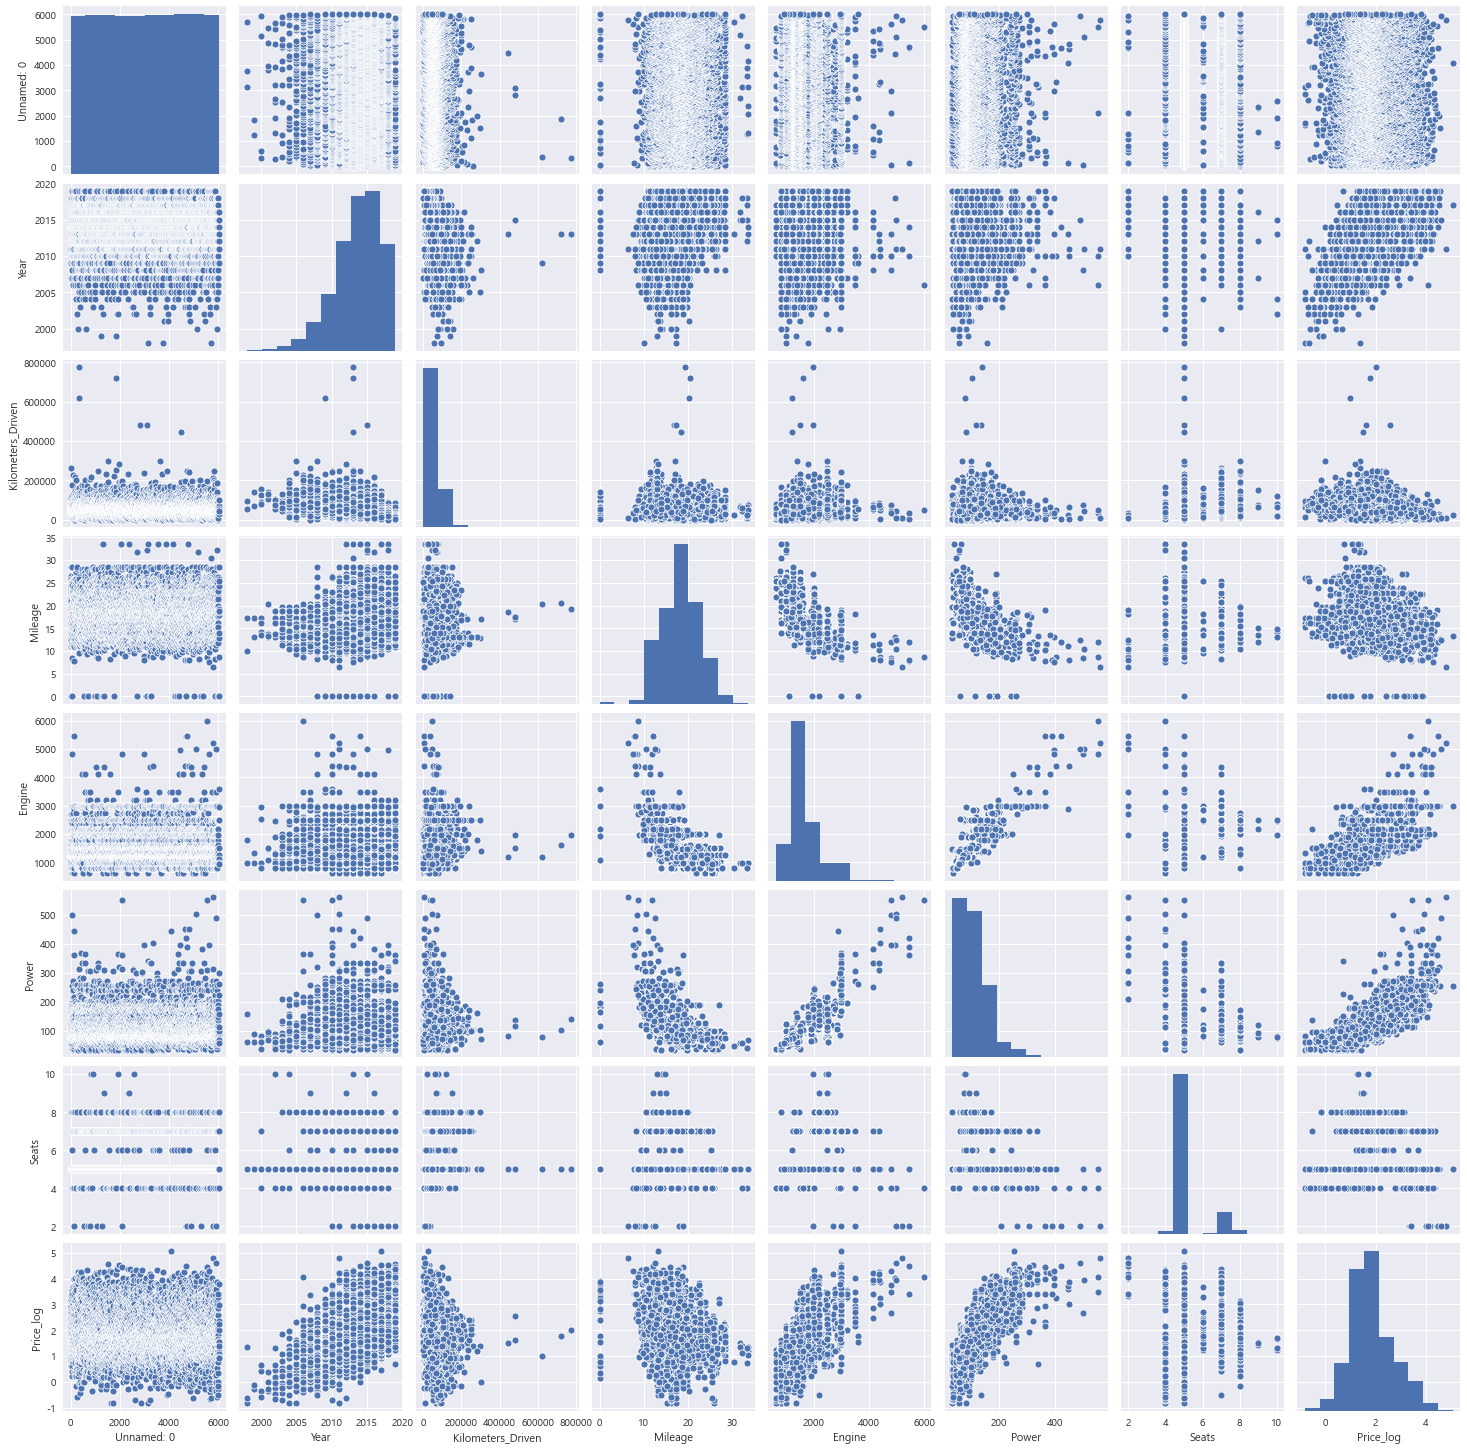

In [25]:
# 회귀분석 기본 가정 검토 : 선형성 
sns.pairplot(data)

* Mileage, Engine. Power를 numeric으로 바꿔졌기에 잘 나타나고 선형성 또한 나쁘지 않아 보인다. 
* 또한 Price_log를 타켓으로하여 선형성을 보았을때, Seats 제외하고는 대부분 선형성을 만족하는 것 같다.

# Data Preprocessing 

## 1. Categorical Variable

* 범주형 변수인 Fuel_Type, Transmission, Owner_Type를 모형에 집어넣기 위해 가변수로 변환시켜준다.

In [26]:
data["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [27]:
data["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
data["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [29]:
dummy = pd.get_dummies(data.Fuel_Type)
dummy.columns=['Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol','Fuel_Type_LPG']

In [30]:
data = pd.concat([data, dummy], axis=1)
data = data.drop(['Fuel_Type'], axis=1)

In [31]:
dummy = pd.get_dummies(data.Transmission)
dummy.columns=['Transmission_Manual','Transmission_Automatic']

In [32]:
data = pd.concat([data, dummy], axis=1)
data = data.drop(['Transmission'], axis=1)

In [33]:
dummy = pd.get_dummies(data.Owner_Type)
dummy.columns=['Owner_Type_First','Owner_Type_Second','Owner_Type_Fourth & Above','Owner_Type_Third']

In [34]:
data = pd.concat([data, dummy], axis=1)
data = data.drop(['Owner_Type'], axis=1)
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_LPG,Transmission_Manual,Transmission_Automatic,Owner_Type_First,Owner_Type_Second,Owner_Type_Fourth & Above,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998,58.16,5.0,0.559616,1,0,0,0,0,1,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582,126.20,5.0,2.525729,0,1,0,0,0,1,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,18.20,1199,88.70,5.0,1.504077,0,0,0,1,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248,88.76,7.0,1.791759,0,1,0,0,0,1,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968,140.80,5.0,2.875822,0,1,0,0,1,0,0,0,1,0


## 2. 변수들 간의 상관관계  

In [35]:
X = data.drop(['Price_log'], axis=1)
y = data.Price_log

In [36]:
# correlation matrix 
X.corr()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_LPG,Transmission_Manual,Transmission_Automatic,Owner_Type_First,Owner_Type_Second,Owner_Type_Fourth & Above,Owner_Type_Third
Unnamed: 0,1.000000,-0.000132,-0.008992,0.015237,-0.005933,-0.012528,-0.014085,0.000760,-0.015896,-0.007294,0.016383,-0.018927,0.018927,-0.001760,-0.019591,0.007619,-0.010995
Year,-0.000132,1.000000,-0.445758,0.285760,-0.068513,0.014032,0.007901,0.021099,0.109535,-0.034947,-0.110931,0.085136,-0.085136,0.364280,-0.062924,-0.294959,-0.223628
Kilometers_Driven,-0.008992,-0.445758,1.000000,-0.132564,0.161086,0.003689,0.212992,-0.006653,0.233423,0.003004,-0.232825,-0.104350,0.104350,-0.195688,0.061336,0.159004,0.111270
Mileage,0.015237,0.285760,-0.132564,1.000000,-0.637349,-0.538946,-0.331619,0.162453,0.097655,0.010472,-0.130150,-0.368343,0.368343,0.142101,-0.037477,-0.118433,-0.074350
Engine,-0.005933,-0.068513,0.161086,-0.637349,1.000000,0.866174,0.401433,-0.086410,0.430012,-0.041082,-0.410695,0.501647,-0.501647,-0.057073,0.015162,0.048641,0.026823
Power,-0.012528,0.014032,0.003689,-0.538946,0.866174,1.000000,0.101684,-0.087444,0.292196,-0.040914,-0.272433,0.644502,-0.644502,-0.030409,-0.005249,0.030974,0.003657
Seats,-0.014085,0.007901,0.212992,-0.331619,0.401433,0.101684,1.000000,-0.029884,0.309663,-0.014559,-0.303256,-0.074476,0.074476,-0.003260,0.030738,-0.004347,0.013569
Fuel_Type_CNG,0.000760,0.021099,-0.006653,0.162453,-0.086410,-0.087444,-0.029884,1.000000,-0.104667,-0.004017,-0.088357,-0.062109,0.062109,-0.001499,-0.003360,0.006477,-0.012866
Fuel_Type_Diesel,-0.015896,0.109535,0.233423,0.097655,0.430012,0.292196,0.309663,-0.104667,1.000000,-0.044458,-0.977944,0.139349,-0.139349,0.035359,0.002406,-0.023864,-0.037322
Fuel_Type_Petrol,-0.007294,-0.034947,0.003004,0.010472,-0.041082,-0.040914,-0.014559,-0.004017,-0.044458,1.000000,-0.037531,-0.026381,0.026381,-0.002609,-0.001427,0.004812,-0.005465


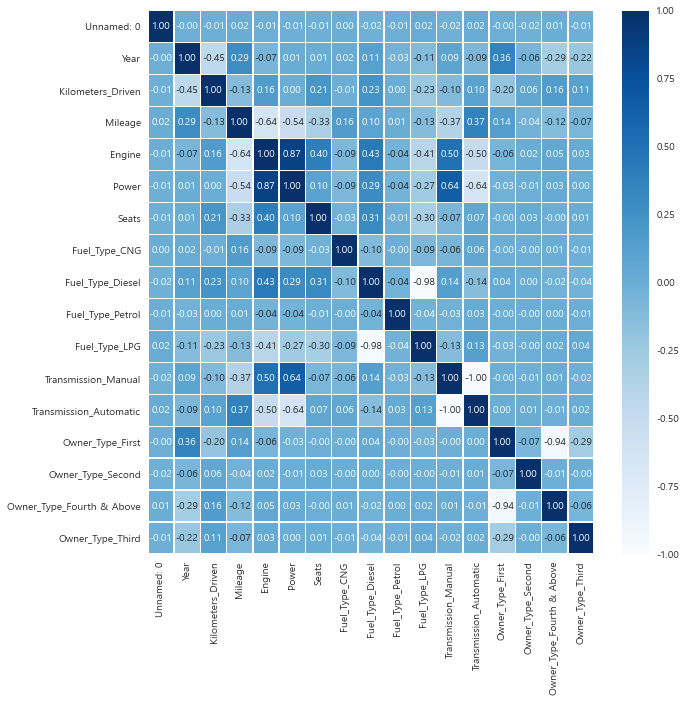

In [37]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

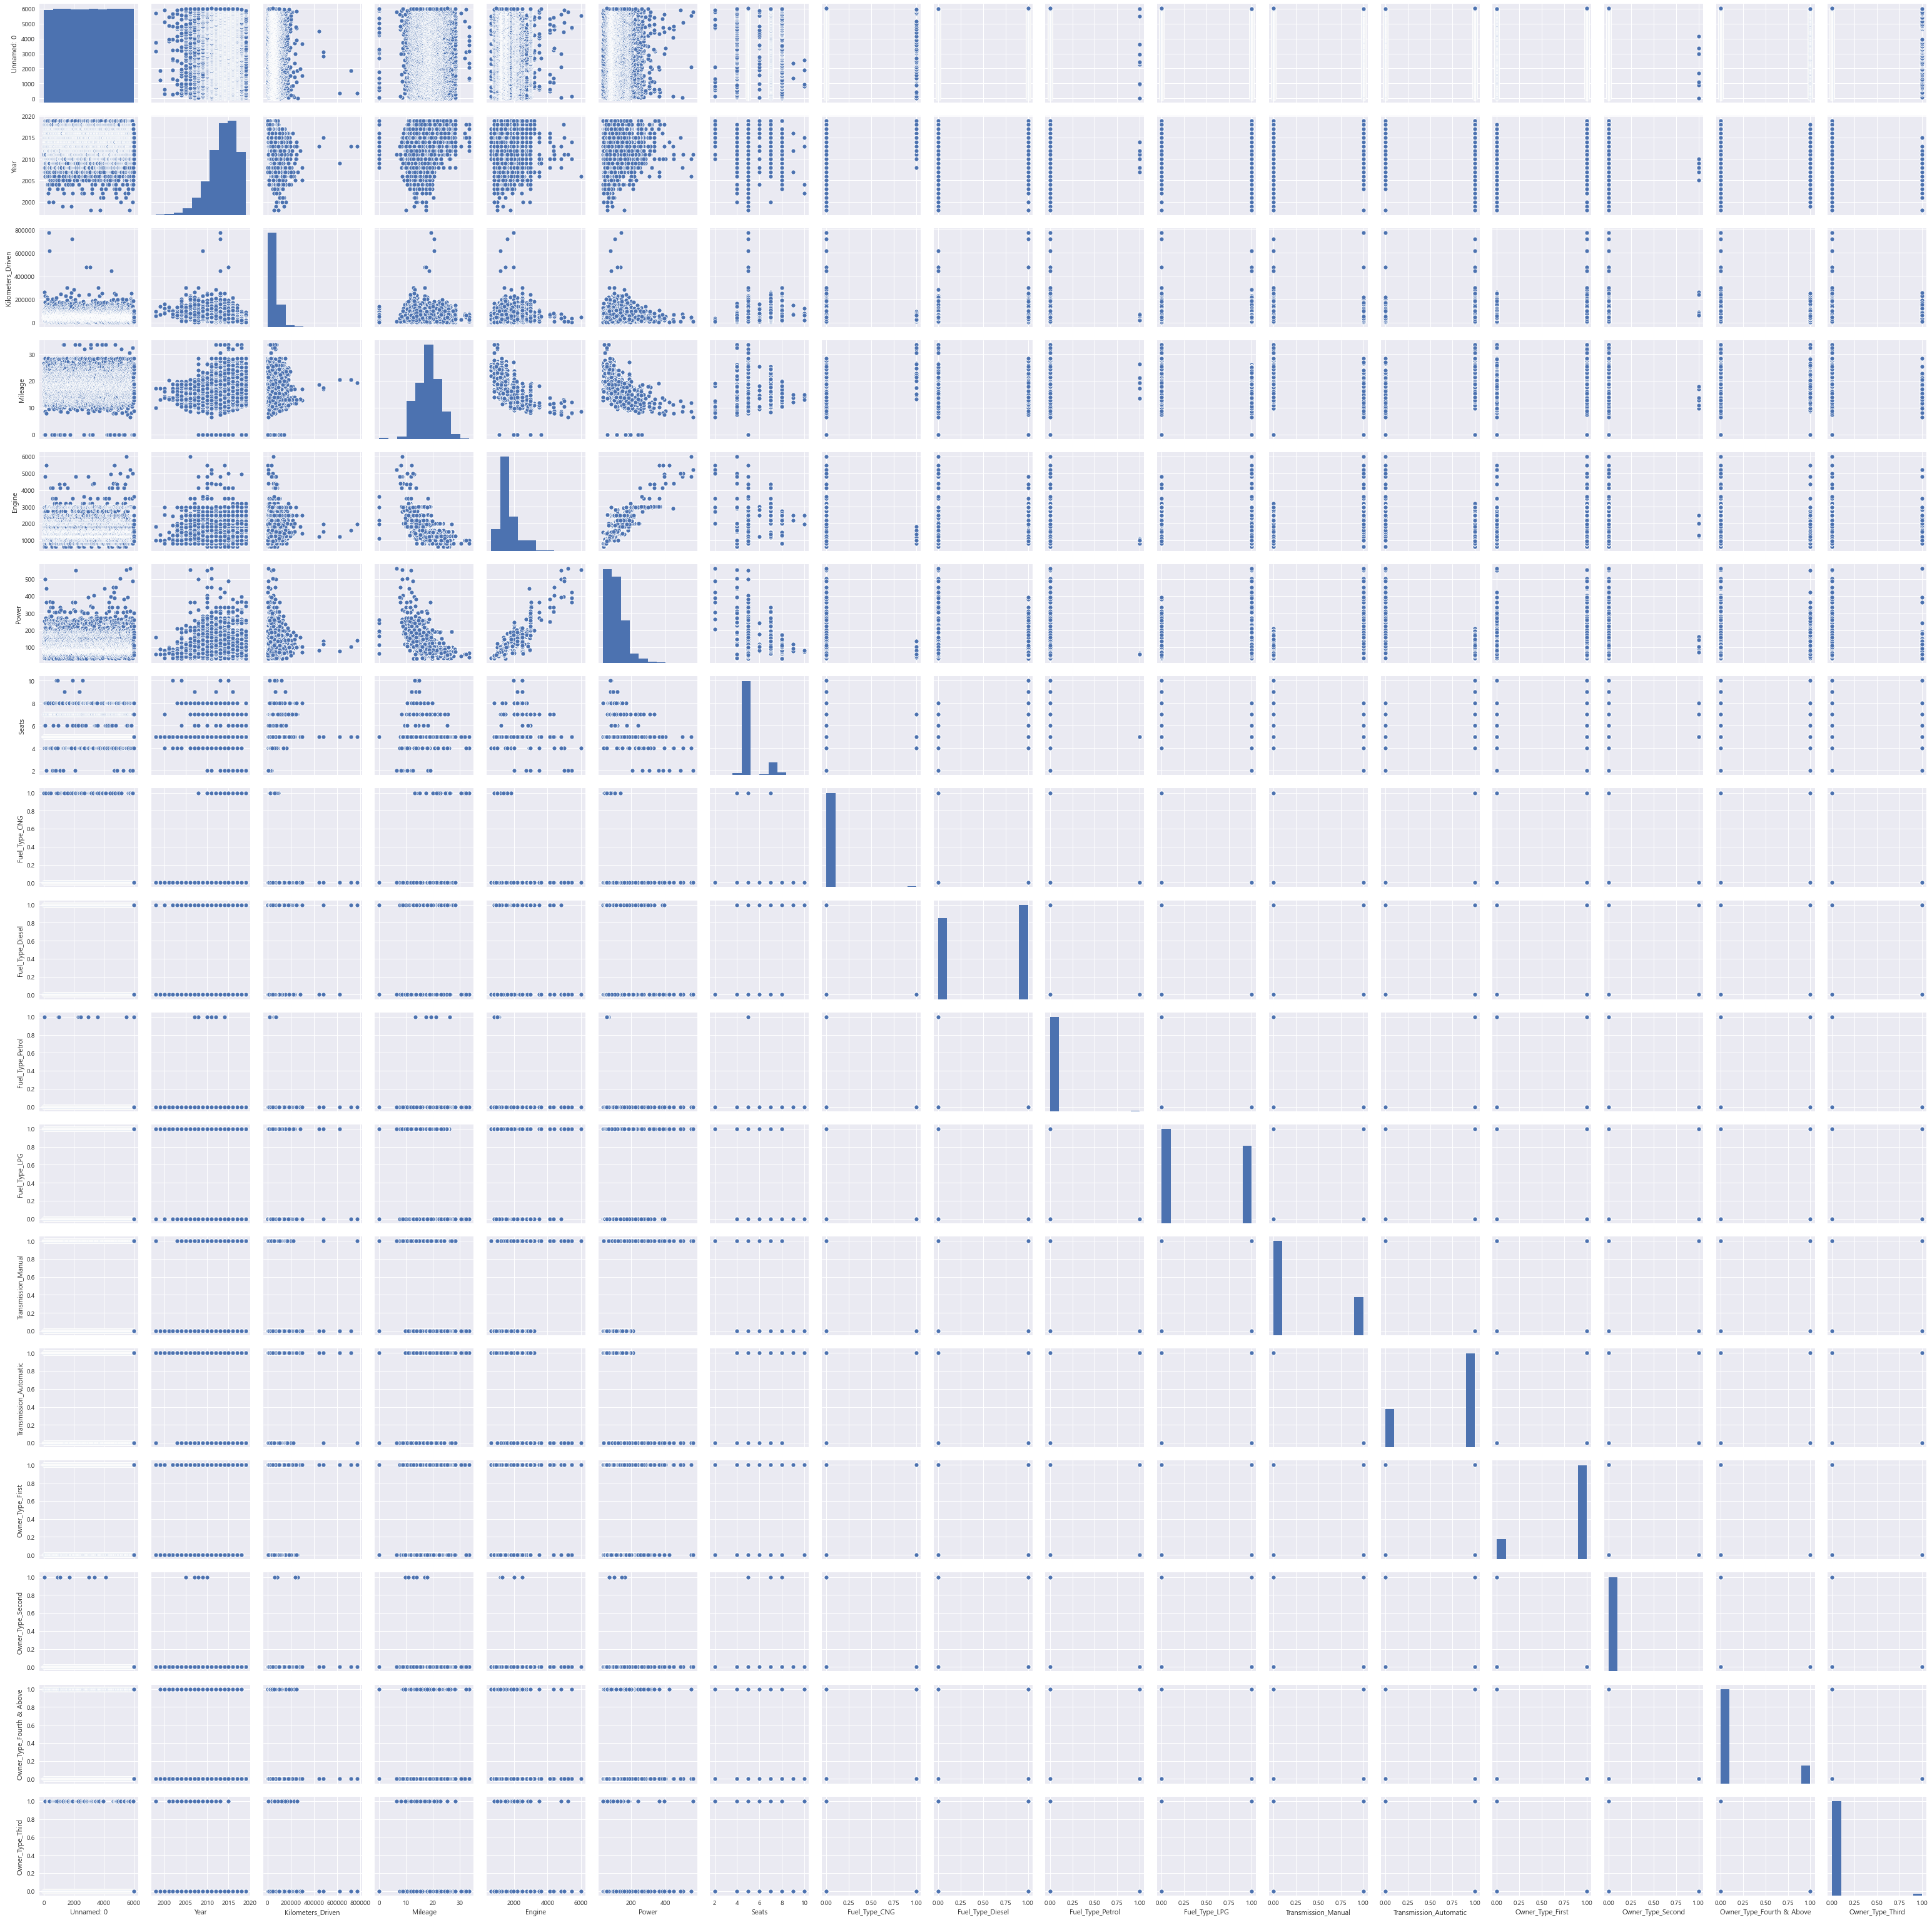

In [38]:
# 변수들 사이의 pairplot 
sns.pairplot(X)

* 상관계수와 pairplot을 보니 Mileage, Engine, Power이 서로 관계가 조금 있어보인다. 
* 그전에 문자형으로 되어있어 별로쓰임이 없는 변수들과 의미없는 'Unnamed: 0'변수를 삭제해준다.

In [39]:
X.drop(['Name'], axis=1,inplace = True)

In [40]:
X.drop(['Location'], axis=1,inplace = True)

In [41]:
X.drop(['Unnamed: 0'], axis=1,inplace = True)

In [42]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Fuel_Type_LPG', 'Transmission_Manual', 'Transmission_Automatic',
       'Owner_Type_First', 'Owner_Type_Second', 'Owner_Type_Fourth & Above',
       'Owner_Type_Third'],
      dtype='object')

In [43]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

C:\Users\Cute\anaconda3_new\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
6,inf,Fuel_Type_CNG
7,inf,Fuel_Type_Diesel
8,inf,Fuel_Type_Petrol
9,inf,Fuel_Type_LPG
10,inf,Transmission_Manual
11,inf,Transmission_Automatic
12,inf,Owner_Type_First
13,inf,Owner_Type_Second
14,inf,Owner_Type_Fourth & Above
15,inf,Owner_Type_Third


* 더미변수를 제외하고는 VIF가 10이하이기 때문에 제거하는 변수 없이 넘어가면 될것 같다.

## 3. target 변수와의 상관관계 

In [44]:
data.corr()['Price_log'].sort_values(ascending=False)

Price_log                    1.000000
Power                        0.769330
Engine                       0.688666
Transmission_Manual          0.618244
Year                         0.486075
Fuel_Type_Diesel             0.431446
Owner_Type_First             0.170331
Seats                        0.167984
Unnamed: 0                  -0.018135
Owner_Type_Second           -0.025580
Fuel_Type_Petrol            -0.046329
Fuel_Type_CNG               -0.072112
Owner_Type_Third            -0.121851
Owner_Type_Fourth & Above   -0.132113
Kilometers_Driven           -0.180978
Mileage                     -0.314423
Fuel_Type_LPG               -0.414464
Transmission_Automatic      -0.618244
Name: Price_log, dtype: float64

* 타겟과의 지나치게 높은 상관관계는 없어보인다

# Modeling 

> 1. from sklearn.linear_model import LinearRegression
> 2. import statsmodels.api as sm

## 1. sklearn LinearRegression

In [45]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [46]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# predict
pred = model.predict(X_train)

In [49]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.8742992574686635

In [50]:
mean_squared_error(y_train, pred)

0.09296467605567482

In [51]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ 1.22493854e-01 -6.92174433e-07 -2.14781564e-02  9.93889506e-05
  7.72732545e-03  1.07142162e-02 -8.30059704e-03  2.00131458e-01
 -4.38595591e-02 -1.47971302e-01  1.56749889e-01 -1.56749889e-01
  3.96037599e-02  7.17798335e-02 -9.80956522e-03 -1.01574028e-01]
-245.45730473550347


In [52]:
# test data R-square
model.score(X_test, y_test)

0.8675290395822125

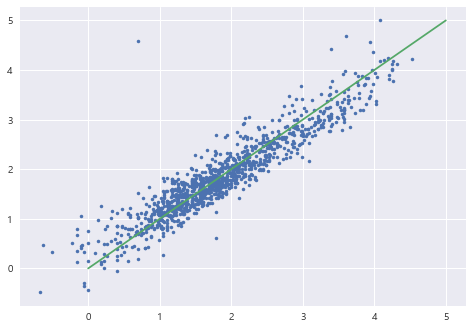

In [53]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 5, 100)
y = x
plt.plot(x, y)
plt.show()

### Ridge, Lasso Regression 

In [54]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge()

In [55]:
# R-square
ridge.score(X_train,y_train)

0.8742989527296834

In [56]:
# Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.8195759123902967

## 2. statsmodel OLS 

In [57]:
import statsmodels.api as sm

In [60]:
X2 = X
y = data.Price_log

In [61]:
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     3096.
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:53:27   Log-Likelihood:                -1411.8
No. Observations:                5871   AIC:                             2852.
Df Residuals:                    5857   BIC:                             2945.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

### backward 

In [62]:
# p-value 값이 큰 Seats 변수 제거해보기 
X3 = X2.drop(["Seats"], axis=1)
y2 = data.Price_log

In [63]:
model = sm.OLS(y2, X3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     3354.
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:53:34   Log-Likelihood:                -1412.8
No. Observations:                5871   AIC:                             2852.
Df Residuals:                    5858   BIC:                             2938.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

* p-value값이 다 좋게 나왔다!

## 회귀분석 가정 검토  

In [64]:
import scipy.stats

In [65]:
# 모델을 통해 얻은 예측값 
pred = result.predict()

In [66]:
# 잔차 = 실제값 - 예측값 
residual = data["Price_log"] - result.predict() 

In [67]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

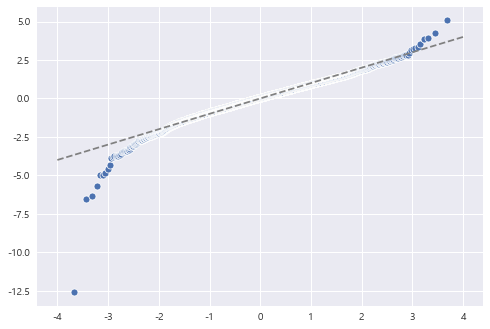

In [68]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-4, 4], [-4, 4], '--', color='grey')

* Normal Q-Q Plot곡선이 완벽한 45도선은 아니지만 나름의 직선의 형태를 띄고있으므로 잔차의 정규성은 어느정도 만족하는 것으로 보인다

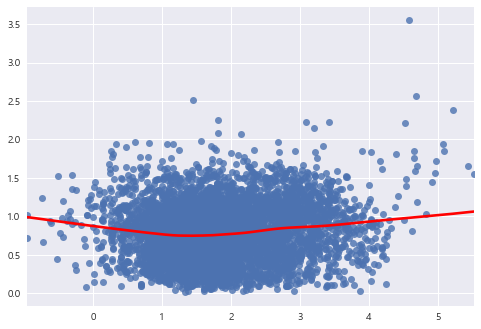

In [69]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

* 빨간선이 거의 수평선이므로 잔차의 등분산성을 어느정도 만족하는 것으로 보인다.

### 피드백받은 내용
넘 깔끔하게 수행해 주셨어요!
1. 오차의 등분산성을 확보하기 위해 skewed 되어 있는 타겟변수를 로그변환 하셔서 회귀 모델에 적합하신 것, 훌륭합니다.
2. 전처리 과정이 너무 좋았어요 ! pairplot 보고 outlier 제거하고, “null” 문자가 있는 변수를 처리해 주는 과정이 인상깊었습니다.
3. backward 과정 통해 변수 선택하신 점 너무 좋았어요 !
4. 전반적으로 회귀분석 과정에 맞게 잘 수행해 주셨습니다. 결과도 너무 잘 나왔네요!


다만 아쉬운 점이 몇 가지 있어 조금만 적어볼게요!
1. “Name”변수
Name 변수 살릴 수 있어요 ㅜㅜ 변수 만드셔서 더미화 시키실 수 있습니다…
- 제조사 : data["Manufacturer"] = data["Name"].apply(lambda x : x.split(' ')[0])
- 차종 : data["Model"] = data["Name"].apply(lambda x : x.split(' ')[1])

2. 더미변수 EDA
더미변수 만드실 때, data[column].unique() 찍어 보시면 해당 변수가 몇 개의 카테고리를 가지고 있는지 알 수 있습니다. 이후 설명변수와 반응변수 사이의 boxplot을 그려서 해당 더미변수가 실제로 영향력이 있는 설명변수인지 체크해 보시면 더욱 좋습니다.

3. 다중공선성 체크
vif 체크는 연속형 변수들끼리만 체크합니다. (카테고리컬한 변수 빼고 continuous한 변수끼리만 체크해 보셨으면 좋았을 것 같아요! ) vif 식을 참고해 보시면 아시겠지만, vif를 계산할 때는 “해당 변수를 반응변수로 설정하고” 회귀식을 적합해서 R-squared 값을 구해서 vif값을 구하게 됩니다. 회귀분석에서는 연속형 변수를 대상으로 회귀식을 적합시키는 건데, 더미변수는 카테고리컬하기에 y 변수로 들어가기에는 부적합하여 다중공선성 체크가 어렵다고 합니다 !
( https://ukchanoh.wordpress.com/2015/02/16/multicollinearity/ )

4. 다중공선성 체크 2
vif를 통해 다중공선성을 잘 체크해 주셨지만, pairplot 보시면 Engine 과 Power 사이의 관계가 선형성을 보이고 있는 것을 볼 수 있습니다. corr heatmap에서도 상관관계가 높은 것을 볼 수 있죠? 이러한 점을 잘 체크해 주세요 ! (최종 모형에서는 Engine과 Power 둘 중 하나의 변수만 들어가는 것이 좋습니다.)